
# Model 4 – Salary Prediction (Regression)

This notebook estimates **annual salary (ConvertedCompYearly)** for developers using the **Stack Overflow Developer Survey 2023**.

**Target:** `ConvertedCompYearly`  
**Features:** `YearsCodePro`, `Country`, `EdLevel`, `Employment`, `DevType`, `LanguageHaveWorkedWith`, `WorkWeekHrs`

Models used:

- Linear Regression  
- Random Forest Regressor  
- XGBoost Regressor  

We will also perform EDA with multiple charts to better understand the data.


In [23]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import joblib
import os

pd.set_option("display.max_columns", None)


## 2) Load Data

In [24]:

df = pd.read_csv("../Data/archive/survey_results_public.csv")

df.head()


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [25]:

# معلومات سريعة عن البيانات
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:

df.columns


Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

## 3) Select Relevant Columns & Basic Cleaning

In [27]:


target_col = "ConvertedCompYearly"
features = [
    "YearsCodePro",
    "Country",
    "EdLevel",
    "Employment",
    "DevType",
    "LanguageHaveWorkedWith"
  
]

data = df[[target_col] + features].copy()
data.head()


,ConvertedCompYearly,YearsCodePro,Country,EdLevel,Employment,DevType,LanguageHaveWorkedWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285000.0,9,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Senior Executive (C-Suite, VP, etc.)",HTML/CSS;JavaScript;Python
2,250000.0,23,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Developer, back-end",Bash/Shell (all shells);Go
3,156000.0,7,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Developer, front-end",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4,23456.0,4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...","Developer, full-stack",HTML/CSS;JavaScript;TypeScript


In [28]:

data.isna().sum()


ConvertedCompYearly       41165
YearsCodePro              23048
Country                    1211
EdLevel                    1211
Employment                 1286
DevType                   12312
LanguageHaveWorkedWith     2044
dtype: int64

In [29]:
data['YearsCodePro'].unique()

array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

In [30]:


data = data[~data[target_col].isna()].copy()


data = data[(data[target_col] >= 5_000) & (data[target_col] <= 500_000)]






data[[target_col] + features].head()


,ConvertedCompYearly,YearsCodePro,Country,EdLevel,Employment,DevType,LanguageHaveWorkedWith
1,285000.0,9,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Senior Executive (C-Suite, VP, etc.)",HTML/CSS;JavaScript;Python
2,250000.0,23,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Developer, back-end",Bash/Shell (all shells);Go
3,156000.0,7,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Developer, front-end",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4,23456.0,4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...","Developer, full-stack",HTML/CSS;JavaScript;TypeScript
5,96828.0,21,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,"Employed, full-time","Developer, back-end",Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...


In [31]:
data.isna().sum()

ConvertedCompYearly         0
YearsCodePro              174
Country                     0
EdLevel                     0
Employment                 12
DevType                    93
LanguageHaveWorkedWith    123
dtype: int64

In [32]:
data.value_counts()

ConvertedCompYearly  YearsCodePro  Country                   EdLevel                                                 Employment           DevType                      LanguageHaveWorkedWith                                    
61000.0              10            Ukraine                   Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         Employed, full-time  Database administrator       SQL                                                           3
165000.0             5             United States of America  Bachelor’s degree (B.A., B.S., B.Eng., etc.)            Employed, full-time  Developer, full-stack        HTML/CSS;JavaScript;Ruby;SQL                                  2
100000.0             7             United States of America  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         Employed, full-time  Research & Development role  C++;Python                                                    2
                                                             Bachelor’s degree (B

## 5) Exploratory Data Analysis (EDA)

### 5.1 Salary Distribution

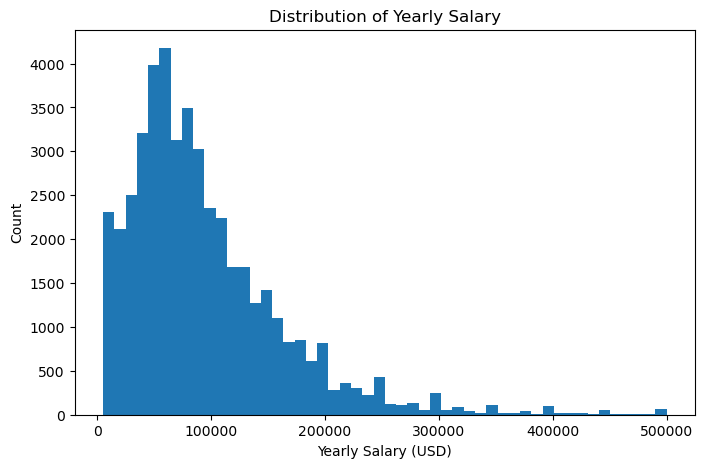

In [33]:

plt.figure(figsize=(8, 5))
plt.hist(data[target_col].dropna(), bins=50)
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Count")
plt.title("Distribution of Yearly Salary")
plt.show()


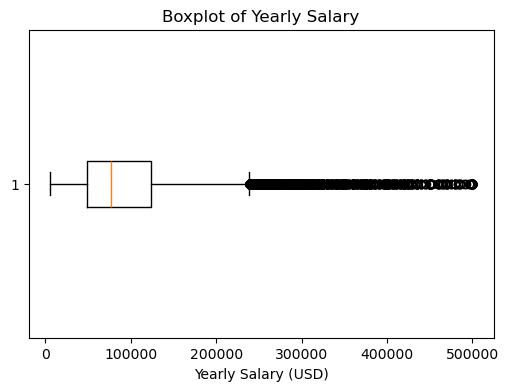

In [34]:

plt.figure(figsize=(6, 4))
plt.boxplot(data[target_col].dropna(), vert=False)
plt.xlabel("Yearly Salary (USD)")
plt.title("Boxplot of Yearly Salary")
plt.show()


### 5.2 Salary vs Years of Professional Coding

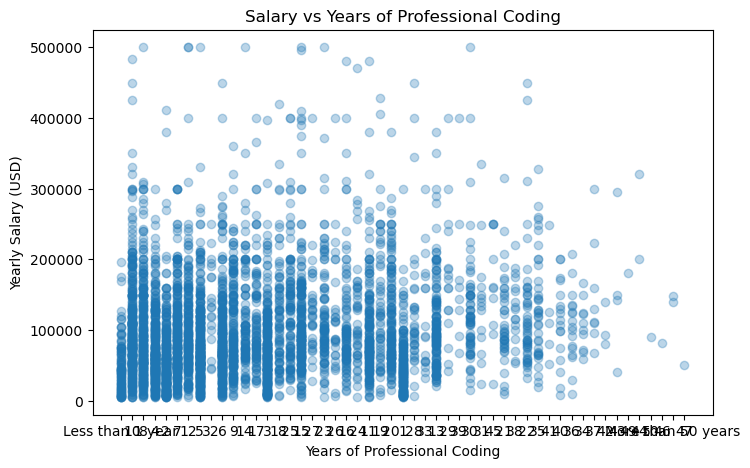

In [35]:

sample = data[[target_col, "YearsCodePro"]].dropna().sample(n=min(5000, len(data)), random_state=42)

plt.figure(figsize=(8, 5))
plt.scatter(sample["YearsCodePro"], sample[target_col], alpha=0.3)
plt.xlabel("Years of Professional Coding")
plt.ylabel("Yearly Salary (USD)")
plt.title("Salary vs Years of Professional Coding")
plt.show()


/tmp/ipykernel_6306/1445071793.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_years = data.groupby("Years_bin")[target_col].median().dropna()


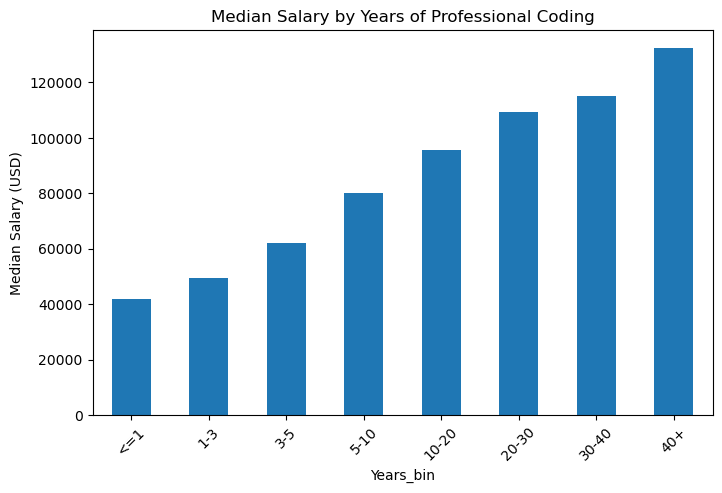

Years_bin
<=1       41765.0
1-3       49578.0
3-5       61935.0
5-10      80000.0
10-20     95599.5
20-30    109490.0
30-40    115245.0
40+      132260.0
Name: ConvertedCompYearly, dtype: float64

In [36]:

# Convert YearsCodePro to numeric, handling non-numeric values
data["YearsCodePro_numeric"] = pd.to_numeric(data["YearsCodePro"], errors='coerce')

bins = [-1, 1, 3, 5, 10, 20, 30, 40, 60]
labels = ["<=1", "1-3", "3-5", "5-10", "10-20", "20-30", "30-40", "40+"]
data["Years_bin"] = pd.cut(data["YearsCodePro_numeric"], bins=bins, labels=labels)

salary_by_years = data.groupby("Years_bin")[target_col].median().dropna()

plt.figure(figsize=(8, 5))
salary_by_years.plot(kind="bar")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary by Years of Professional Coding")
plt.xticks(rotation=45)
plt.show()

salary_by_years


### 5.3 Salary by Country (Top 10 by Count)

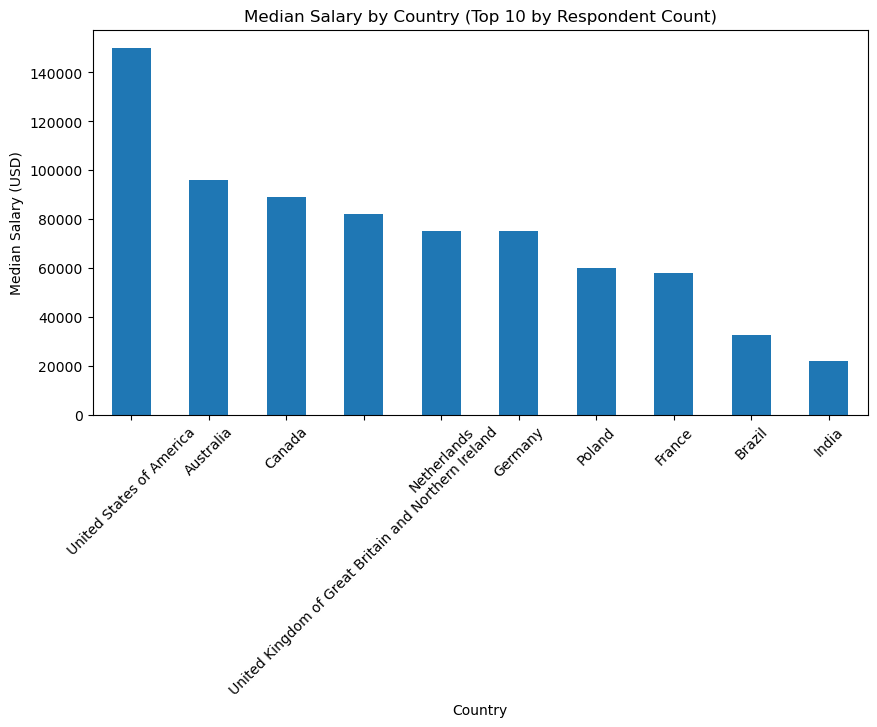

Country
United States of America                                150000.0
Australia                                                95851.0
Canada                                                   89222.0
United Kingdom of Great Britain and Northern Ireland     81931.0
Netherlands                                              74963.0
Germany                                                  74963.0
Poland                                                   59815.0
France                                                   57828.0
Brazil                                                   32460.0
India                                                    21810.0
Name: ConvertedCompYearly, dtype: float64

In [37]:

country_counts = data["Country"].value_counts()
top_countries = country_counts.head(10).index

salary_by_country = (
    data[data["Country"].isin(top_countries)]
    .groupby("Country")[target_col]
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
salary_by_country.plot(kind="bar")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary by Country (Top 10 by Respondent Count)")
plt.xticks(rotation=45)
plt.show()

salary_by_country


### 5.4 Salary by Education Level

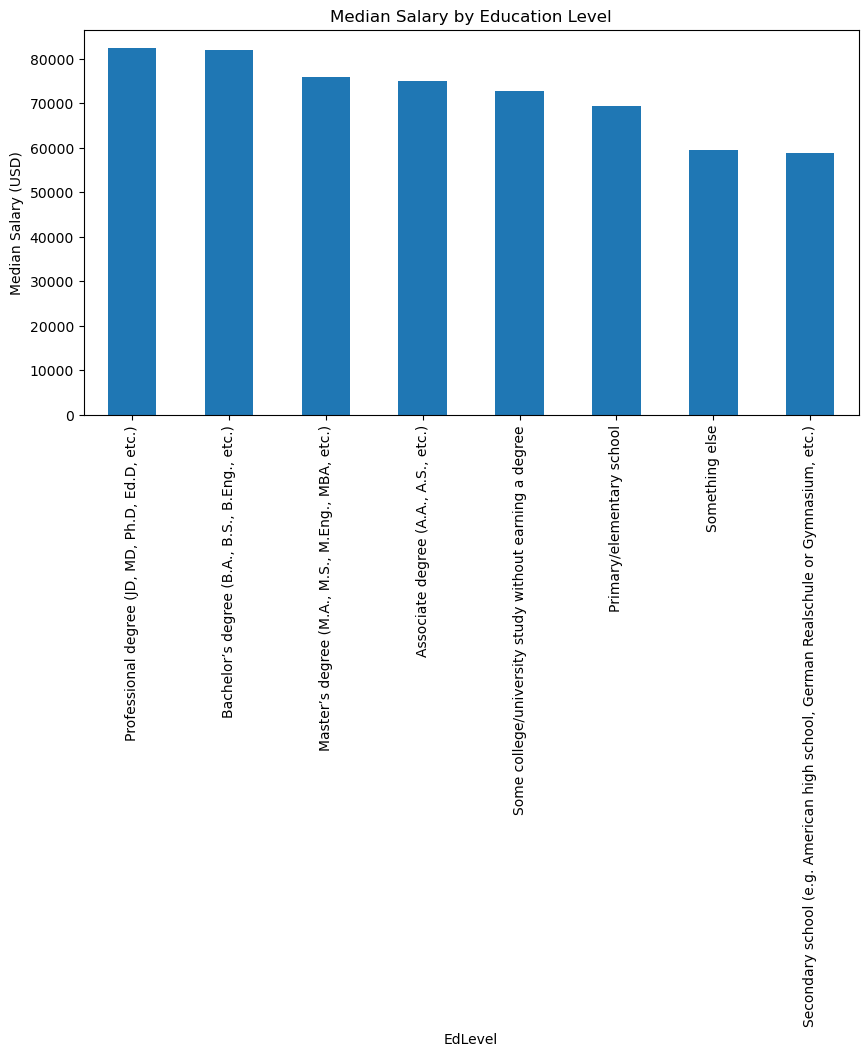

EdLevel
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        82429.5
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          82000.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       75898.0
Associate degree (A.A., A.S., etc.)                                                   74963.0
Some college/university study without earning a degree                                72821.0
Primary/elementary school                                                             69493.0
Something else                                                                        59487.5
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    58899.0
Name: ConvertedCompYearly, dtype: float64

In [38]:

edu_salary = (
    data.groupby("EdLevel")[target_col]
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
edu_salary.plot(kind="bar")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary by Education Level")
plt.xticks(rotation=90)
plt.show()

edu_salary


## 6) Simplify Multi-label Columns (DevType, LanguageHaveWorkedWith)

In [39]:


def get_first_item(cell):
    if pd.isna(cell):
        return np.nan
    if isinstance(cell, str):
        parts = [p.strip() for p in cell.split(";") if p.strip() != ""]
        if len(parts) > 0:
            return parts[0]
    return cell

data["DevType_first"] = data["DevType"].apply(get_first_item)
data["Lang_first"] = data["LanguageHaveWorkedWith"].apply(get_first_item)

data_clean = data.copy()
data_clean = data_clean.drop(columns=["DevType", "LanguageHaveWorkedWith"])

data_clean.head()


,ConvertedCompYearly,YearsCodePro,Country,EdLevel,Employment,YearsCodePro_numeric,Years_bin,DevType_first,Lang_first
1,285000.0,9,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",9.0,5-10,"Senior Executive (C-Suite, VP, etc.)",HTML/CSS
2,250000.0,23,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",23.0,20-30,"Developer, back-end",Bash/Shell (all shells)
3,156000.0,7,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",7.0,5-10,"Developer, front-end",Bash/Shell (all shells)
4,23456.0,4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...",4.0,3-5,"Developer, full-stack",HTML/CSS
5,96828.0,21,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,"Employed, full-time",21.0,20-30,"Developer, back-end",Bash/Shell (all shells)


## 7) Train / Test Split

In [ ]:

data_clean["YearsCodePro"] = pd.to_numeric(data_clean["YearsCodePro"], errors='coerce')

feature_cols = [
    "YearsCodePro",
    "Country",
    "EdLevel",
    "Employment",
    "DevType_first",
    "Lang_first"
]

X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((36644, 6), (9162, 6))

## 8) Preprocessing Pipeline

In [41]:

numeric_features = ["YearsCodePro"]

categorical_features = [
    "Country", "EdLevel", "Employment", "DevType_first", "Lang_first"
]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


## 9) Define Models

In [42]:

models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),
    "XGBRegressor": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        objective="reg:squarederror"
    )
}

results = []
pipelines = {}


## 10) Train & Evaluate Models

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

for name, model in models.items():
    print(f"\n==========================")
    print(f"Training model: {name}")
    print(f"==========================")

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)


    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse  = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    overfit_rmse = test_rmse - train_rmse

    results.append({
        "model": name,
        "train_MAE": train_mae,
        "test_MAE": test_mae,
        "train_RMSE": train_rmse,
        "test_RMSE": test_rmse,
        "train_R2": train_r2,
        "test_R2": test_r2,
        "overfit_RMSE": overfit_rmse,
        "pipeline": pipe
    })

    pipelines[name] = pipe

    print(f"Train MAE:  {train_mae:.2f}")
    print(f"Test  MAE:  {test_mae:.2f}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test  RMSE: {test_rmse:.2f}")
    print(f"Train R2:   {train_r2:.4f}")
    print(f"Test  R2:   {test_r2:.4f}")
    print(f"Overfit (RMSE diff): {overfit_rmse:.2f}")



Training model: LinearRegression
Train MAE:  31530.49
Test  MAE:  31760.38
Train RMSE: 48940.18
Test  RMSE: 49439.19
Train R2:   0.4994
Test  R2:   0.5007
Overfit (RMSE diff): 499.00

Training model: RandomForestRegressor
Train MAE:  31530.49
Test  MAE:  31760.38
Train RMSE: 48940.18
Test  RMSE: 49439.19
Train R2:   0.4994
Test  R2:   0.5007
Overfit (RMSE diff): 499.00

Training model: RandomForestRegressor
Train MAE:  16312.92
Test  MAE:  32774.33
Train RMSE: 28040.55
Test  RMSE: 51565.13
Train R2:   0.8357
Test  R2:   0.4568
Overfit (RMSE diff): 23524.58

Training model: XGBRegressor
Train MAE:  16312.92
Test  MAE:  32774.33
Train RMSE: 28040.55
Test  RMSE: 51565.13
Train R2:   0.8357
Test  R2:   0.4568
Overfit (RMSE diff): 23524.58

Training model: XGBRegressor
Train MAE:  28859.55
Test  MAE:  30344.09
Train RMSE: 44853.24
Test  RMSE: 47518.71
Train R2:   0.5795
Test  R2:   0.5387
Overfit (RMSE diff): 2665.47
Train MAE:  28859.55
Test  MAE:  30344.09
Train RMSE: 44853.24
Test  RMSE

## 11) Compare Results & Select Best Model

In [44]:

y_median = y_train.median()

y_pred_baseline = np.full_like(y_test, y_median)

baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print("Baseline MAE:", baseline_mae)
print("Baseline RMSE:", baseline_rmse)
results_df = pd.DataFrame(results)
results_df


Baseline MAE: 49369.58262388125
Baseline RMSE: 72330.54398353245


,model,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2,overfit_RMSE,pipeline
0,LinearRegression,31530.487847,31760.384154,48940.184375,49439.186395,0.499406,0.500653,499.002020,"(ColumnTransformer(transformers=[('num',\n ..."
1,RandomForestRegressor,16312.918051,32774.332124,28040.551110,51565.134839,0.835666,0.456785,23524.583728,"(ColumnTransformer(transformers=[('num',\n ..."
2,XGBRegressor,28859.553646,30344.086840,44853.236195,47518.711046,0.579523,0.538694,2665.474851,"(ColumnTransformer(transformers=[('num',\n ..."


/tmp/ipykernel_6306/2676702887.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(results_df['model'], rotation=45, ha='right')


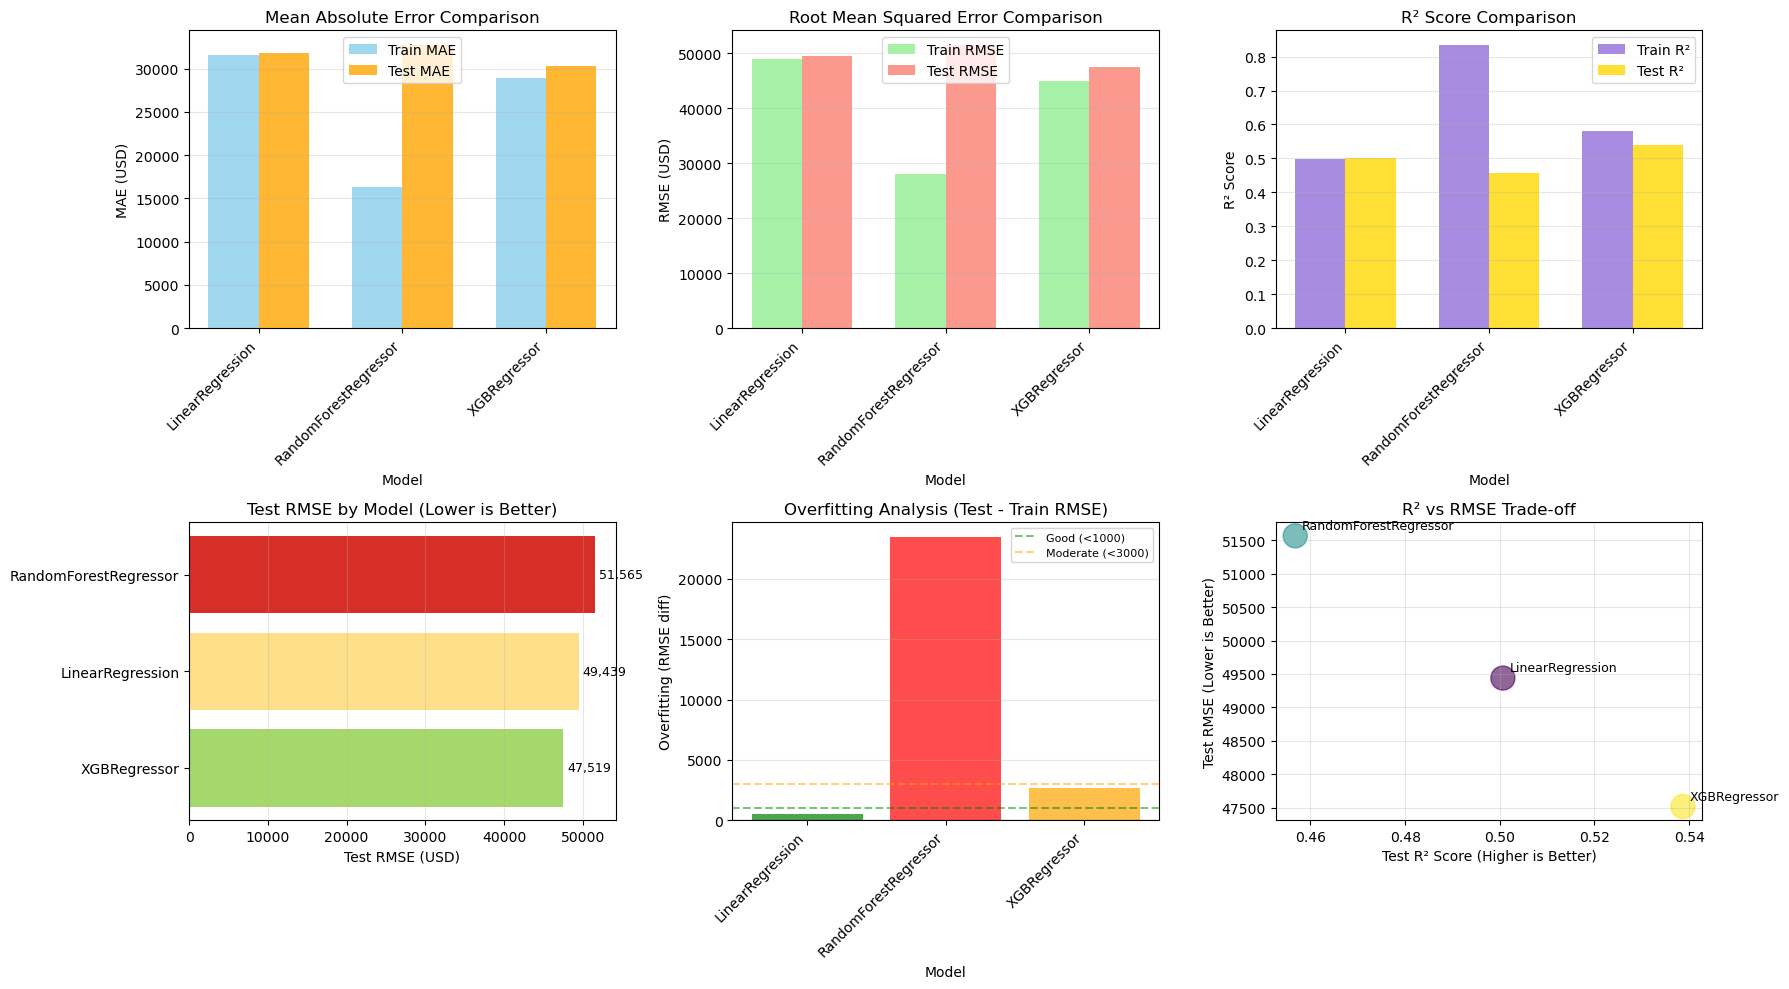

In [ ]:

import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))


ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
width = 0.35
ax1.bar(x_pos - width/2, results_df['train_MAE'], width, label='Train MAE', alpha=0.8, color='skyblue')
ax1.bar(x_pos + width/2, results_df['test_MAE'], width, label='Test MAE', alpha=0.8, color='orange')
ax1.set_xlabel('Model')
ax1.set_ylabel('MAE (USD)')
ax1.set_title('Mean Absolute Error Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)


ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, results_df['train_RMSE'], width, label='Train RMSE', alpha=0.8, color='lightgreen')
ax2.bar(x_pos + width/2, results_df['test_RMSE'], width, label='Test RMSE', alpha=0.8, color='salmon')
ax2.set_xlabel('Model')
ax2.set_ylabel('RMSE (USD)')
ax2.set_title('Root Mean Squared Error Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)


ax3 = axes[0, 2]
ax3.bar(x_pos - width/2, results_df['train_R2'], width, label='Train R²', alpha=0.8, color='mediumpurple')
ax3.bar(x_pos + width/2, results_df['test_R2'], width, label='Test R²', alpha=0.8, color='gold')
ax3.set_xlabel('Model')
ax3.set_ylabel('R² Score')
ax3.set_title('R² Score Comparison')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['model'], rotation=45, ha='right')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)


ax4 = axes[1, 0]
sorted_df = results_df.sort_values('test_RMSE')
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(sorted_df)))
ax4.barh(sorted_df['model'], sorted_df['test_RMSE'], color=colors)
ax4.set_xlabel('Test RMSE (USD)')
ax4.set_title('Test RMSE by Model (Lower is Better)')
ax4.grid(axis='x', alpha=0.3)
for i, v in enumerate(sorted_df['test_RMSE']):
    ax4.text(v + 500, i, f'{v:,.0f}', va='center', fontsize=9)


ax5 = axes[1, 1]
colors_overfit = ['green' if abs(x) < 1000 else 'orange' if abs(x) < 3000 else 'red' 
                  for x in results_df['overfit_RMSE']]
ax5.bar(results_df['model'], results_df['overfit_RMSE'], color=colors_overfit, alpha=0.7)
ax5.set_xlabel('Model')
ax5.set_ylabel('Overfitting (RMSE diff)')
ax5.set_title('Overfitting Analysis (Test - Train RMSE)')
ax5.set_xticklabels(results_df['model'], rotation=45, ha='right')
ax5.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax5.axhline(y=1000, color='green', linestyle='--', alpha=0.5, label='Good (<1000)')
ax5.axhline(y=3000, color='orange', linestyle='--', alpha=0.5, label='Moderate (<3000)')
ax5.legend(fontsize=8)
ax5.grid(axis='y', alpha=0.3)


ax6 = axes[1, 2]
scatter = ax6.scatter(results_df['test_R2'], results_df['test_RMSE'], 
                     s=300, alpha=0.6, c=range(len(results_df)), cmap='viridis')
for i, model in enumerate(results_df['model']):
    ax6.annotate(model, (results_df['test_R2'].iloc[i], results_df['test_RMSE'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
ax6.set_xlabel('Test R² Score (Higher is Better)')
ax6.set_ylabel('Test RMSE (Lower is Better)')
ax6.set_title('R² vs RMSE Trade-off')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:

metrics_display = results_df[['model', 'train_MAE', 'test_MAE', 'train_RMSE', 'test_RMSE', 'train_R2', 'test_R2', 'overfit_RMSE']].copy()

print("Detailed Model Performance Metrics:")
print("="*100)
display(metrics_display.style.format({
    'train_MAE': '{:,.2f}',
    'test_MAE': '{:,.2f}',
    'train_RMSE': '{:,.2f}',
    'test_RMSE': '{:,.2f}',
    'train_R2': '{:.4f}',
    'test_R2': '{:.4f}',
    'overfit_RMSE': '{:+,.2f}'
}).background_gradient(cmap='RdYlGn_r', subset=['test_MAE', 'test_RMSE'])\
  .background_gradient(cmap='RdYlGn', subset=['test_R2']))

Detailed Model Performance Metrics:


,model,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2,overfit_RMSE
0,LinearRegression,"31,530.49","31,760.38","48,940.18","49,439.19",0.4994,0.5007,+499.00
1,RandomForestRegressor,"16,312.92","32,774.33","28,040.55","51,565.13",0.8357,0.4568,"+23,524.58"
2,XGBRegressor,"28,859.55","30,344.09","44,853.24","47,518.71",0.5795,0.5387,"+2,665.47"


In [47]:

results_sorted = sorted(
    results, 
    key=lambda r: (r["test_RMSE"], abs(r["overfit_RMSE"]))
)

best = results_sorted[0]
best


{'model': 'XGBRegressor',
 'train_MAE': 28859.553646444507,
 'test_MAE': 30344.086839610536,
 'train_RMSE': np.float64(44853.23619457426),
 'test_RMSE': np.float64(47518.71104555553),
 'train_R2': 0.5795230718840143,
 'test_R2': 0.5386943284219208,
 'overfit_RMSE': np.float64(2665.4748509812707),
 'pipeline': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['YearsCodePro']),
                                                  ('cat',
                                                   Pipeline(steps=[('imputer',
                                          

In [48]:

print(
    f"Selected best model: {best['model']} "
    f"with Test_RMSE={best['test_RMSE']:.2f}, "
    f"Test_R2={best['test_R2']:.4f}, "
    f"Overfit_RMSE={best['overfit_RMSE']:.2f}"
)


Selected best model: XGBRegressor with Test_RMSE=47518.71, Test_R2=0.5387, Overfit_RMSE=2665.47


## 12) Save Best Pipeline

In [ ]:


os.makedirs("../Models", exist_ok=True)

best_model_name = best["model"]
best_pipeline = best["pipeline"]

model_path = os.path.join("../Models", f"best_salary_model_{best_model_name}.pkl")
joblib.dump(best_pipeline, model_path)

print("Saved best salary prediction model pipeline to:", model_path)


Saved best salary prediction model pipeline to: ../Models/best_salary_model_XGBRegressor.pkl


## 13) Example: Load & Predict

In [ ]:


loaded_model = joblib.load(model_path)

example = pd.DataFrame([{
    "YearsCodePro": 3,
    "Country": "Egypt",
    "EdLevel": "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
    "Employment": "Employed, full-time",
    "DevType_first": "Developer, full-stack",
    "Lang_first": "JavaScript"
}])

pred_salary = loaded_model.predict(example)[0]
print(f"Predicted yearly salary: {pred_salary:,.2f} USD")


Predicted yearly salary: 24,579.96 USD
